Logistic regression is:

   - a binary classification model (class "0" or "1")
   - can be used for applications like spam detection
   - supervised learning

# Method
1. Compute probability in class "1":

Use sigmoid function to project the linear combination of all features into scores betwen 0 to 1 (the probability of being in class "1"):

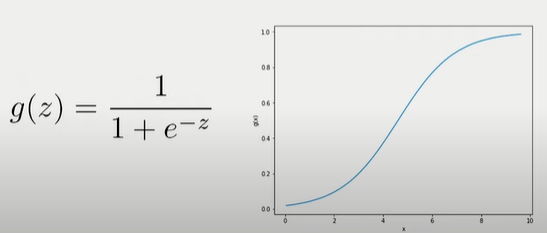

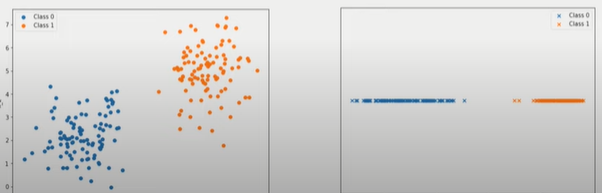

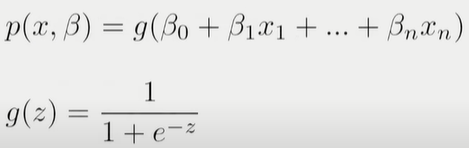

with:
- x the features
- beta(s) the parameters 

Betas are obtained using a training set and the maximum likelihood estimation:

- we use betas, x, and y to formulate the likelihood to obtain the observed class
- then we estimate betas to maximize the likelihood

In other words, we want to find betas in order to maximize the probability of observing the data that we observe

For xi features and a yi observed class:

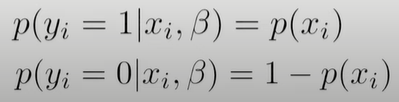

In a sequence of Bernoulli trials y1,...,yn each trial has its own sucess probability is p1,...,pn.

As a result, the likelihood function is:

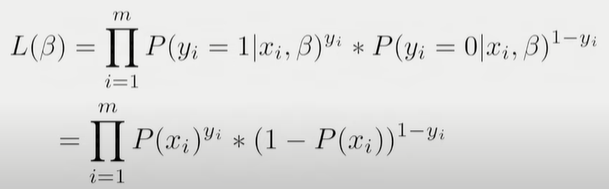

After taking the log to remove the exponents we obtain:

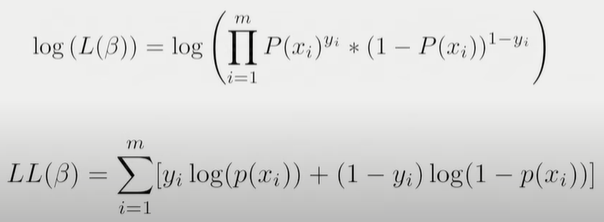

Now that we have the log likelihood, we need to find betas to maximize this sum.

Unfortunately, in order to maximize the likelihood we cannot set the derivative to zero since no closed form exists.

Therefore, we can use gradient descent to minimize the log loss function, which is the opposite of the log likelihood function

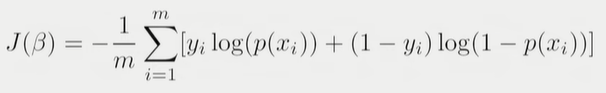

Therefore we now want to find betas to minimize the log loss function over multiple iterations using gradient descent.

To do so:
- Start with a random guess
- Compute the log loss associated with betas
- Compute the gradient descent
- update betas
- Repeat until convergence

For the gradiant at beta(j) it is equal to p(xi), the probability obersving class 1, minus the observed class yi times xij, then we take the average of all data points by dividing by m:
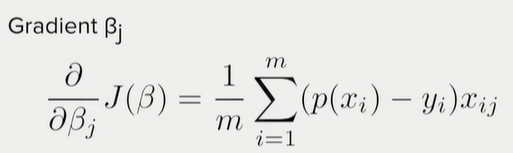

with:
- i: index of data points 1,..,m
- j: index of features 1,...,n

2. Predict classes based on probability & threshold


# Implementation
For clarity, better maintenance and optimization, the implementation is performed using a main function and helper functions.

## Helper functions

In [2]:
# Initialize parameters:
def initialize_params():
    """
    This function initialize beta_0 as zeros and other betas as random values.
    """
    beta_0 = 0
    beta_other = [random.random() for _ in range(n)]
    return beta_0, beta_other

In [ ]:
#Compute the gradients:
def compute_gradients(x, y, beta_0, beta_other, m, n):
    """Compute the gradients"""
    #Initialize gradients
    gradient_beta_0 = 0
    gradient_beta_other = [0] * n
    
    # Look through all data points to cumulate the gradients computed for each data point:
    for i, point in enumerate(x):
        #Get prediction using the logistic function:
        pred = logistic_function(point, beta_0, beta_other)
        
        for j, feature in enumerate(point):
            gradient_beta_other[j] += (pred - y[i]) * feature / m #j features of i data points, normalized by the number of data points m (/m)
            gradient_beta_0 += (pred - y[i]) / m
        
        return gradient_beta_0, gradient_beta_other
        #obtain the gradient at beta_0: prediction - yi:

def logistic_function_np(point, beta_0, beta_other):
    return 1 / (1 + np.exp(-(beta_0 + point.dot(beta_other))))
        

In [ ]:
# update the value of betas based on the gradients obtained:
def update_params(beta_0, beta_other, gradient_beta_0, gradient_beta_other, learning_rate):
    """update the value of betas based on the gradients obtained"""
    beta_0 -= gradient_beta_0 * learning_rate
    for i in range(len(beta_other)):
        beta_other[i] -= (gradient_beta_other[i] * learning_rate)
    
    return beta_0, beta_other


## Main function

In [ ]:
# Main function:
def logistic_regression(x, y, iterations=100, learning_rate=0.01):
    """
    Time complexity is O(m*n*i) with i iterations, n data points(beta), and m features
    Space complexity: O(n) Storage of the gradients
    """
    #Initialize the parameters:
    m, n = len(x), len(x[0])
    beta_0, beta_other = initialize_params(n)
    #For each number of steps specified we:
    for _ in range(iterations):
        
        #Derive the gradients at each beta:
        gradient_beta_0, gradient_beta_other = compute_gradients_minibatch(x, y, beta_0, beta_other, m, n, 50)
        
        #Update beta values using the gradients:
        beta_0, beta_other = update_params(beta_0, beta_other, gradient_beta_0, gradient_beta_other, learning_rate)
        
    return beta_0, beta_other

# Note
The batch gradient descent implemented in this notebook needs to loop through the entire dataset to compute the gradient and make one step towards to target. In real world condition, it can take time and possibly cannot fit into memory.

To optimize the computing time, we can use mini batch gradient descent.
- takes a random mini batch 
- smaller data size (more likely to fit into memory)
- faster computation of the gradient, but might be noiser due to outliers

In [ ]:
#Compute the gradients:
def compute_gradients_minibatch(x, y, beta_0, beta_other, m, n, batch_size):
    """Compute the gradients"""
    #Initialize gradients
    gradient_beta_0 = 0
    gradient_beta_other = [0] * n
    
    # Look through all data points to cumulate the gradients computed for each data point:
    for _ in range(batch_size):
        i = random.randint(0, m-1)
        point = x[i]
        #Get prediction using the logistic function:
        pred = logistic_function(point, beta_0, beta_other)
        
        for j, feature in enumerate(point):
            gradient_beta_other[j] += (pred - y[i]) * feature / batch_size #j features of i data points, normalized by the number of data points m (/m)
            gradient_beta_0 += (pred - y[i]) / batch_size
        
        return gradient_beta_0, gradient_beta_other
        #obtain the gradient at beta_0: prediction - yi: